In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from scipy.stats import mode

warnings.filterwarnings('ignore')
%matplotlib inline

# 讀入train data

* 讀入data

In [2]:
df_train = pd.read_csv('datasets/train.csv')

* 檢視table基本資訊

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 檢查欄位內容

### * 檢查欄位重複值

In [5]:
df_train.apply(lambda x:x.unique().shape[0],axis=0)

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          5
MasVnrArea        328
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         6
GarageType          7
GarageYrBlt        98
GarageFinish        4
GarageCars          5
GarageArea        441
GarageQual          6
GarageCond          6
PavedDrive

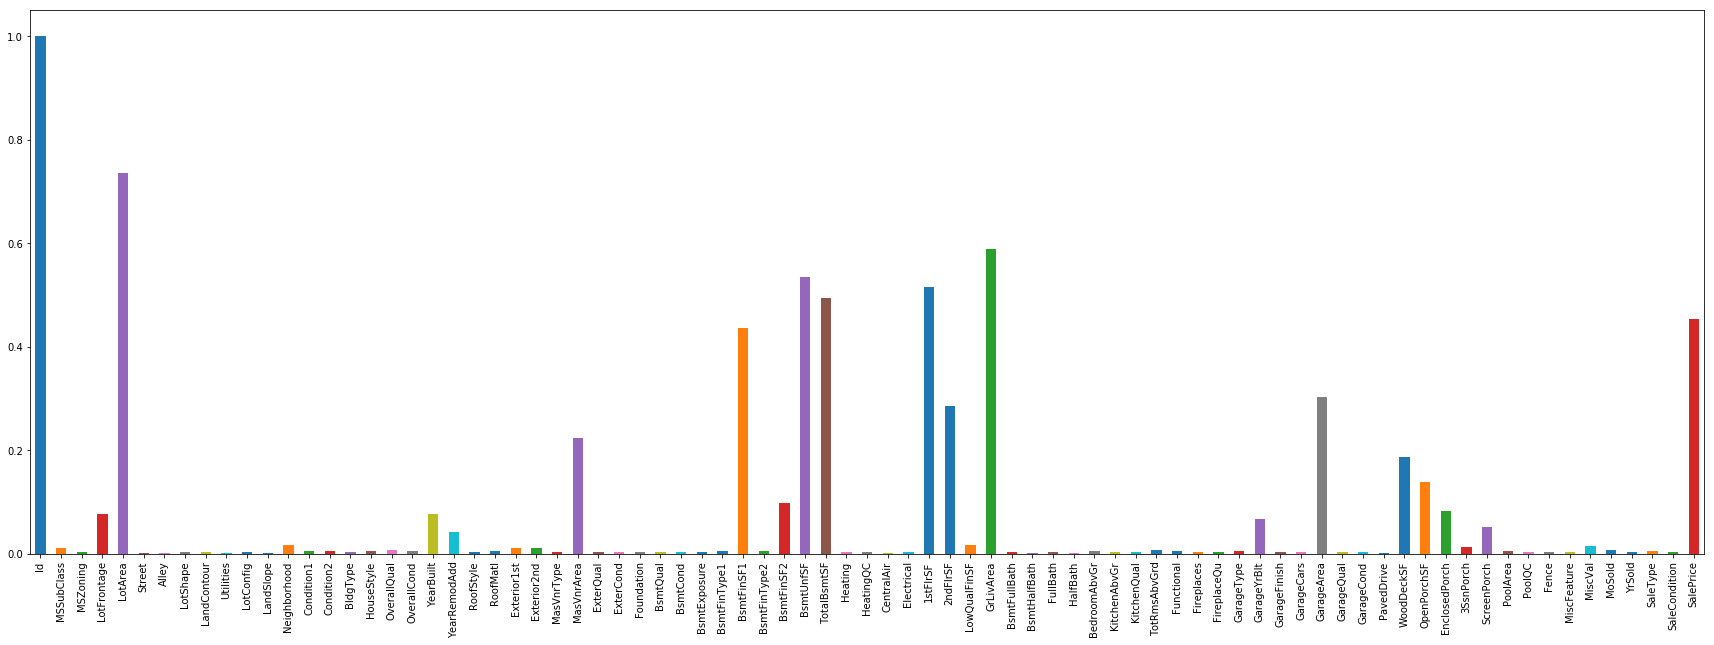

In [6]:
plt.figure(figsize=(30,10))
(df_train.apply(lambda x:x.unique().shape[0],axis=0)/df_train.shape[0]).plot(kind='bar',rot=45)
plt.xticks(rotation=90);
# 上圖中，若欄位所對應的y值小，則代表該欄位的值有高度重複的現象。
# 也就是說，該欄位可能為類別型變數。而若y值=1,則代表該欄位無重複值，有可能為索引或是連續型變數

### * 檢查欄位空值

In [7]:
df_train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

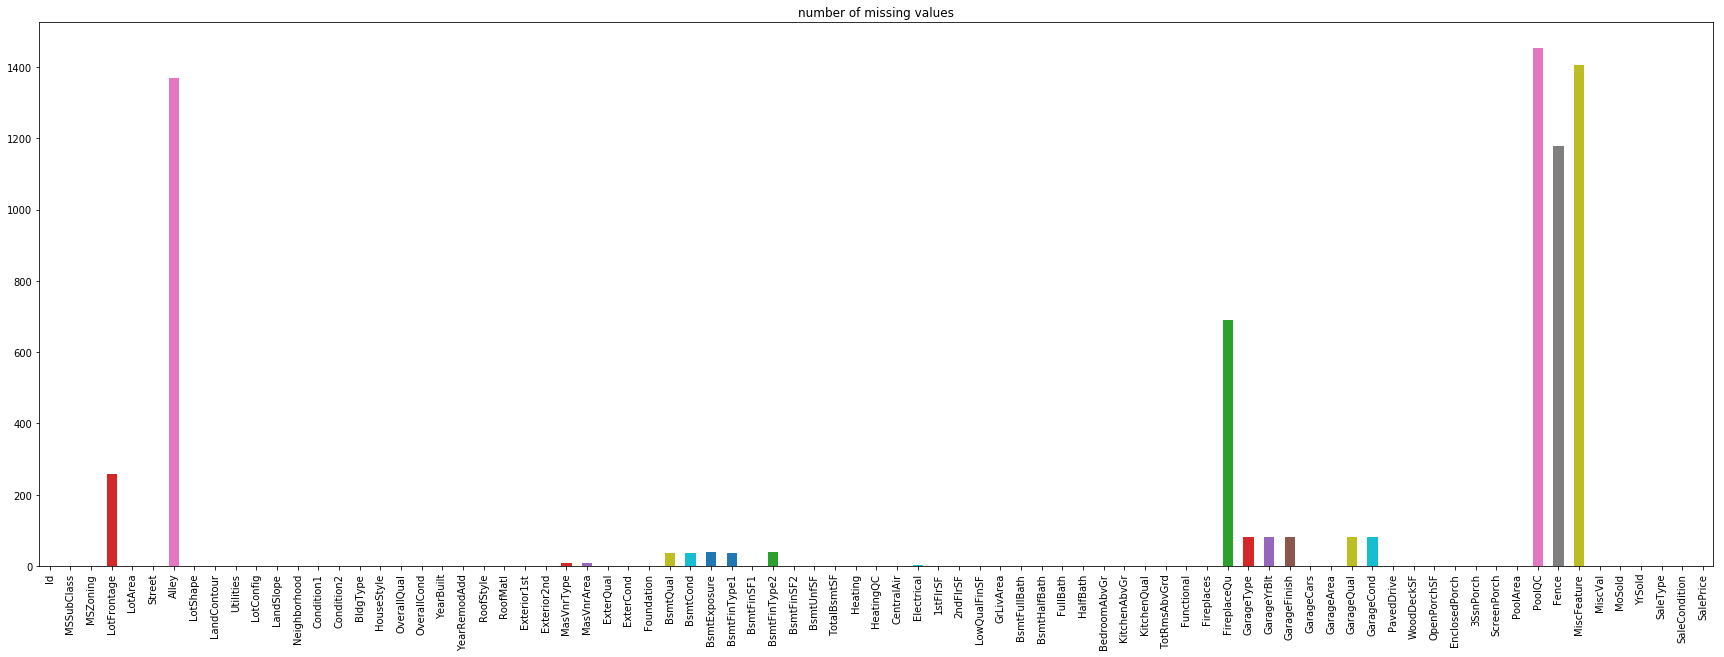

In [8]:
plt.figure(figsize=(30,10))
df_train.isnull() \
       .sum() \
       .plot(kind='bar',title='number of missing values')


以下5個欄位空值太多 (>40%)可以考慮整刪除

'LotFrontage','FireplaceQu','PoolQC','Fence', 'MiscFeature'

In [9]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

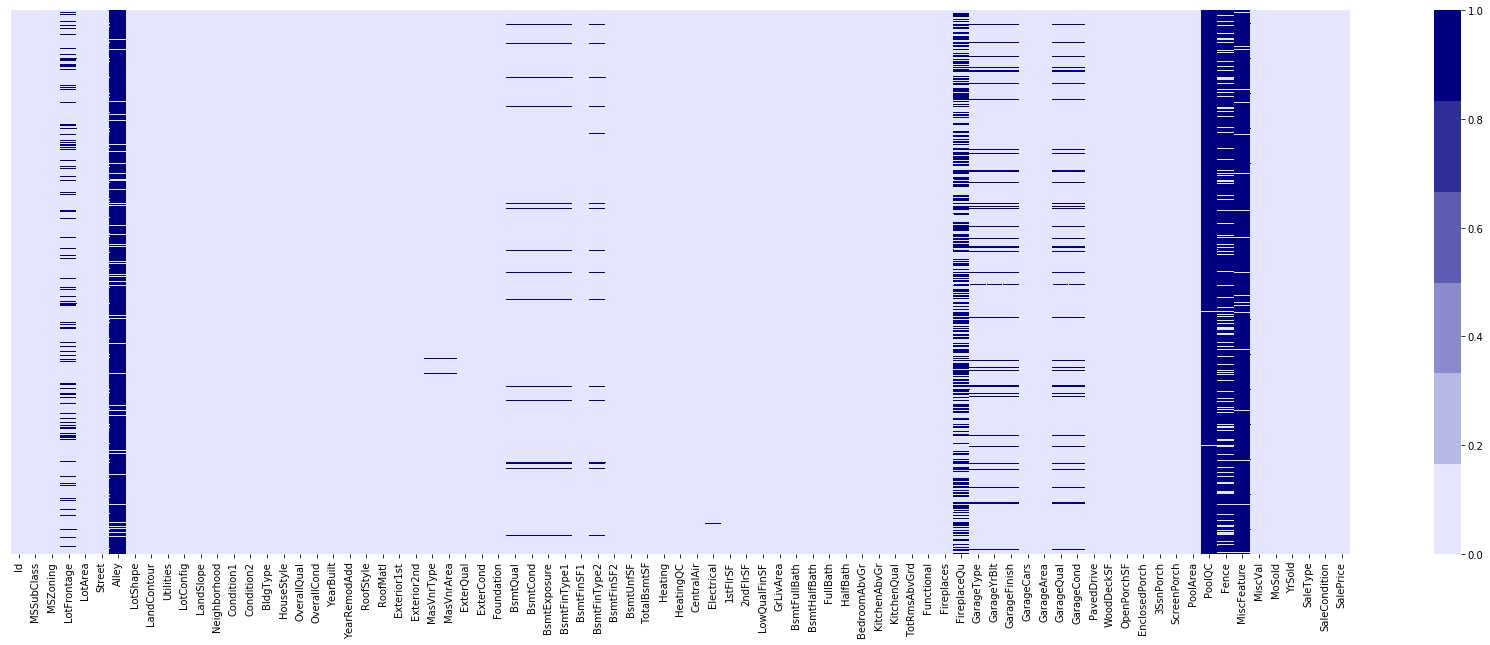

In [10]:
plt.figure(figsize=(30,10))
cmap=sns.light_palette("navy", reverse=False)
sns.heatmap(df_train.isnull().astype(np.int8),yticklabels=False,cmap=cmap)

# 針對個別欄位細看欄位資訊

### sales price

In [11]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

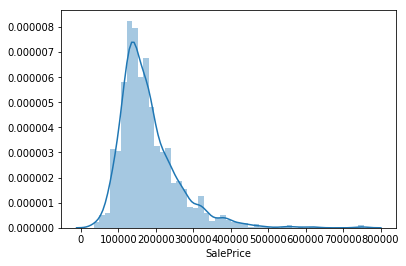

In [12]:
#histogram
sns.distplot(df_train['SalePrice']);

In [13]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### 檢視欄位correlation

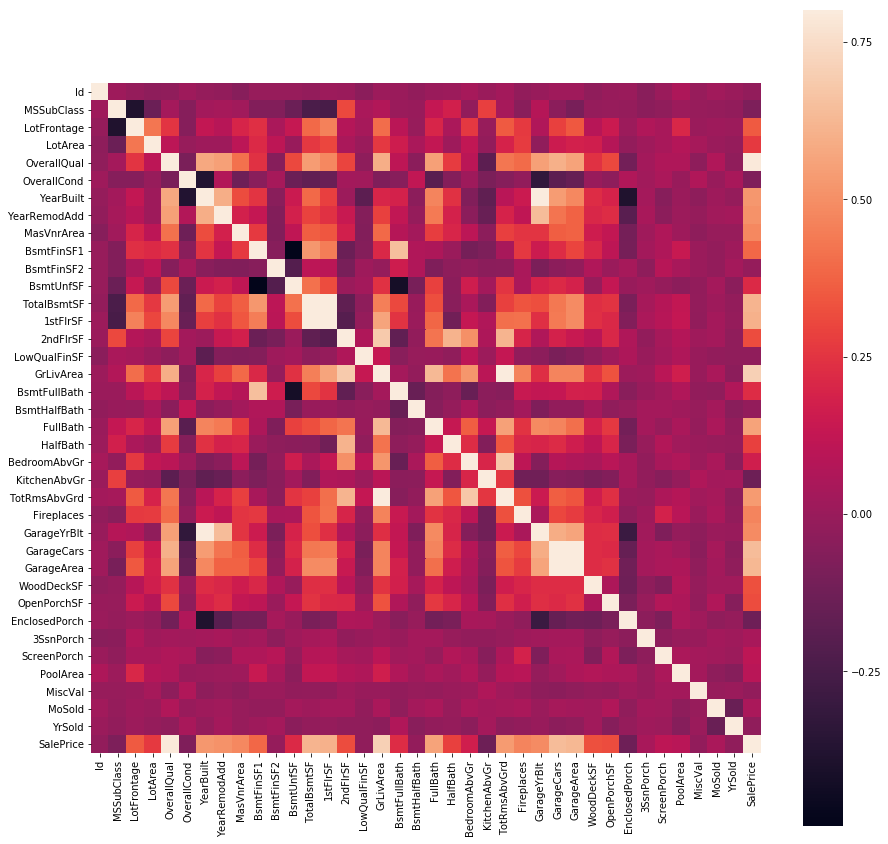

In [14]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, vmax=.8, square=True);

In [15]:
corDf=df_train.corr()
corDf['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

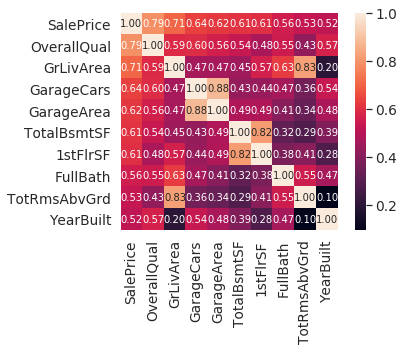

In [16]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

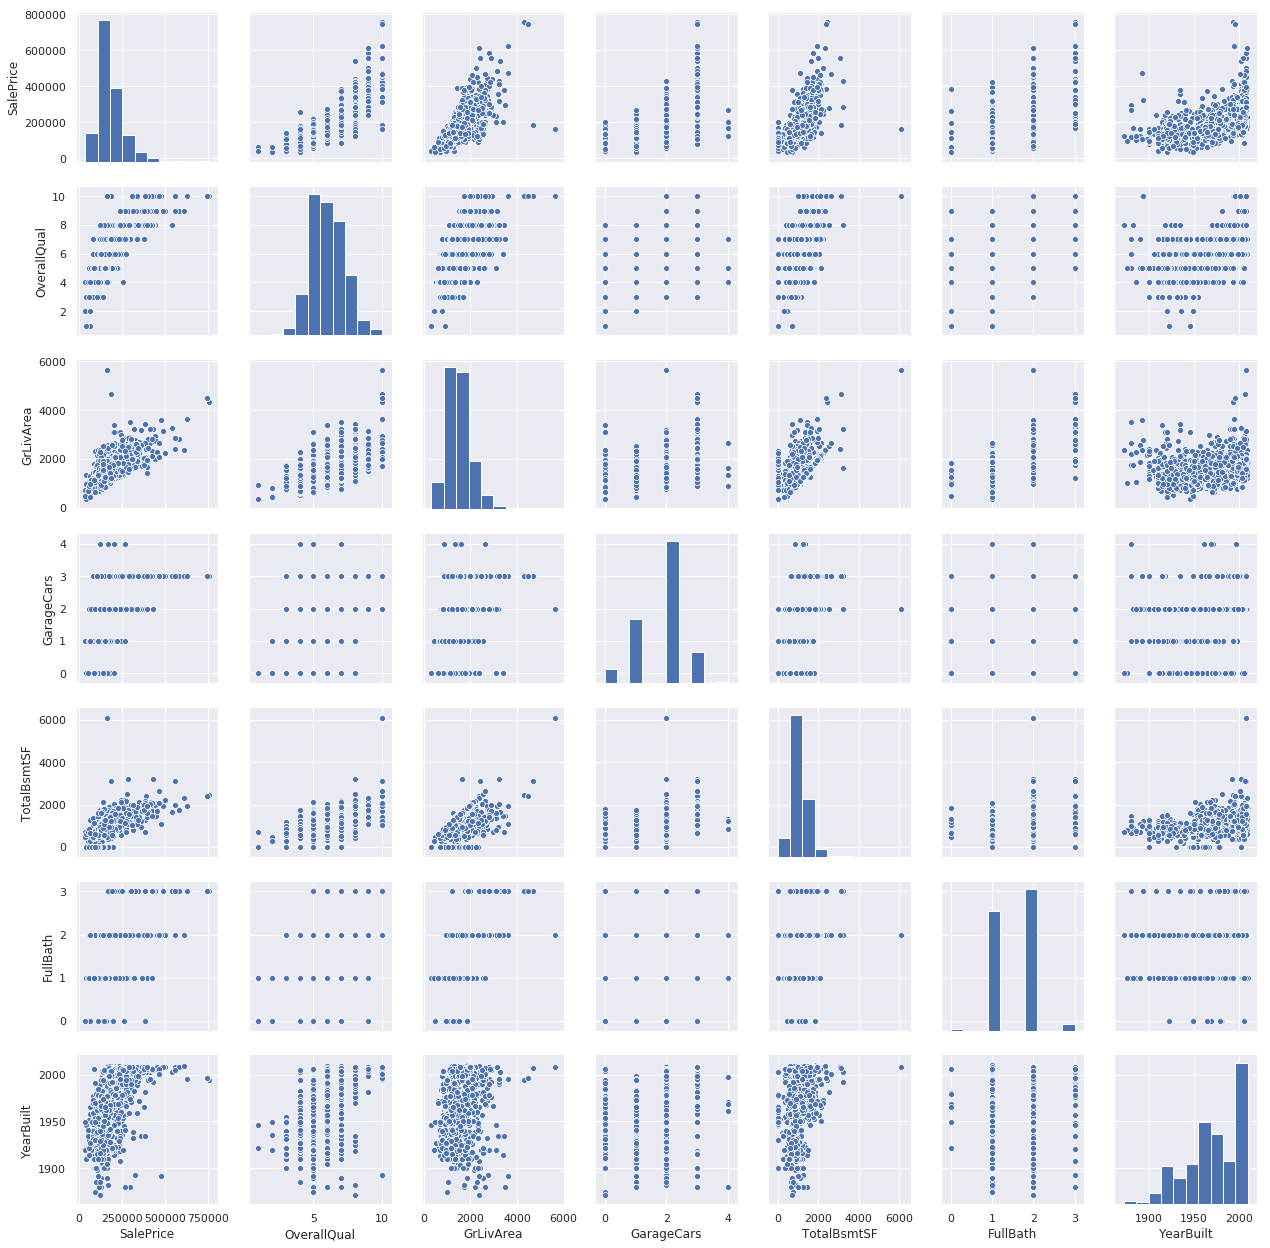

In [17]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

#### 類別型欄位

In [61]:
# for col in df_train.columns:
#     if df_train.col.dtype == 'object':
#         print(col)

In [22]:
#box plot over saleprice
plt.figure(num='box plot over saleprice',figsize=(20,20),dpi=1000)

plt.subplot(9,5,1)
var = 'MSZoning'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
#fig.axis(ymin=0, ymax=800000);


plt.subplot(9,5,2)
var = 'Street'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)

plt.subplot(9,5,3)
var = 'Alley'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,4)
var = 'LotShape'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)

plt.subplot(9,5,5)
var = 'LandContour'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,6)
var = 'Utilities'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)

plt.subplot(9,5,7)
var = 'LotConfig'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)

plt.subplot(9,5,8)
var = 'LandSlope'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)

plt.subplot(9,5,9)
var = 'Neighborhood'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,10)
var = 'Condition1'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,11)
var = 'Condition2'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,12)
var = 'BldgType'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,13)
var = 'HouseStyle'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,14)
var = 'RoofStyle'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,15)
var = 'RoofMatl'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,16)
var = 'Exterior1st'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,17)
var = 'Exterior2nd'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,18)
var = 'MasVnrType'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,19)
var = 'ExterQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,20)
var = 'ExterCond'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,21)
var = 'Foundation'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,22)
var = 'BsmtQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,23)
var = 'BsmtCond'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,24)
var = 'BsmtExposure'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,25)
var = 'BsmtFinType1'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,26)
var = 'BsmtFinType2'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,27)
var = 'Heating'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);
a
plt.subplot(9,5,28)
var = 'HeatingQC'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,29)
var = 'CentralAir'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,30)
var = 'Electrical'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,31)
var = 'KitchenQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,32)
var = 'Functional'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,33)
var = 'FireplaceQu'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,34)
var = 'GarageType'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,35)
var = 'GarageFinish'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,36)
var = 'GarageQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,37)
var = 'GarageCond'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,38)
var = 'PavedDrive'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,39)
var = 'PoolQC'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,40)
var = 'Fence'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,41)
var = 'MiscFeature'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,42)
var = 'SaleType'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

plt.subplot(9,5,43)
var = 'SaleCondition'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

## 處理空值

In [90]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000
YearRemodAdd      0  0.000000

### 數值型欄位

* GarageYrBlt
* LotFrontage
* MasVnrArea


Text(0,0.5,'Sales Price')

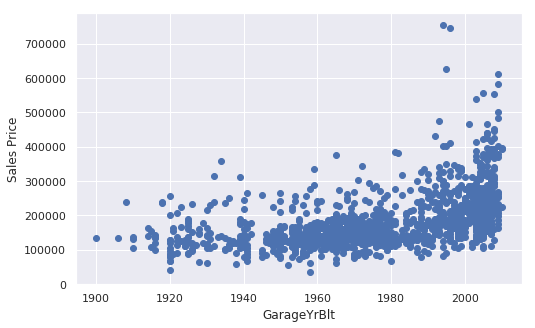

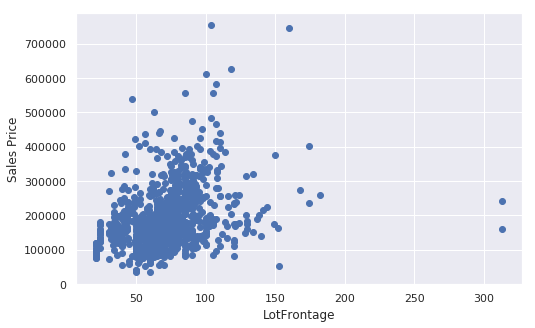

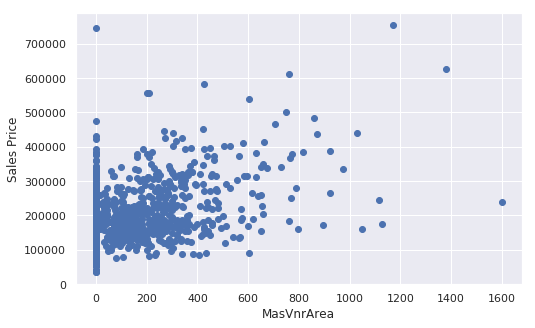

In [63]:
plt.figure(figsize=(8,5))
var = 'GarageYrBlt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = plt.scatter(x=var, y="SalePrice", data=data)
plt.xlabel(var)
plt.ylabel('Sales Price')

plt.figure(figsize=(8,5))
var = 'LotFrontage'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = plt.scatter(x=var, y="SalePrice", data=data)
plt.xlabel(var)
plt.ylabel('Sales Price')

plt.figure(figsize=(8,5))
var = 'MasVnrArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = plt.scatter(x=var, y="SalePrice", data=data)
plt.xlabel(var)
plt.ylabel('Sales Price')


* GarageYrBlt

Text(0,0.5,'GarageYrBlt')

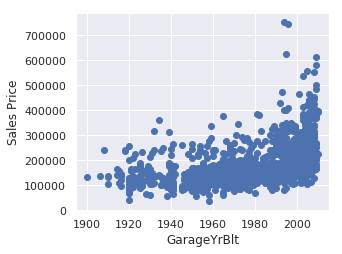

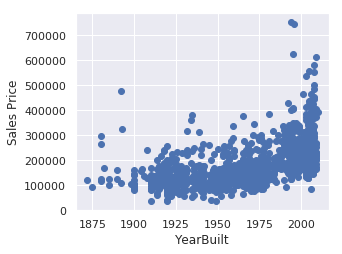

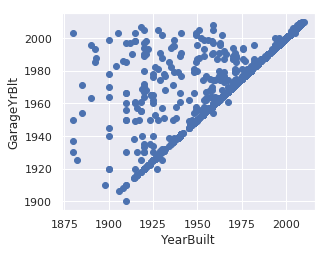

In [64]:
# missing value for GarageYrBlt
# result: GarageYrBlt & YearBuilt 共線, delet column "GarageYrBlt"

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
var = 'GarageYrBlt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = plt.scatter(x=var, y="SalePrice", data=data)
plt.xlabel(var)
plt.ylabel('Sales Price')

#YearBuilt
plt.figure(figsize=(10,8))
plt.subplot(2,2,2)
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = plt.scatter(x=var, y="SalePrice", data=data)
plt.xlabel(var)
plt.ylabel('Sales Price')

#YearBuilt
plt.figure(figsize=(10,8))
plt.subplot(2,2,3)
var = 'YearBuilt'
data = pd.concat([df_train['GarageYrBlt'], df_train[var]], axis=1)
fig = plt.scatter(x=var, y="GarageYrBlt", data=data)
plt.xlabel(var)
plt.ylabel('GarageYrBlt')


* LotFrontage

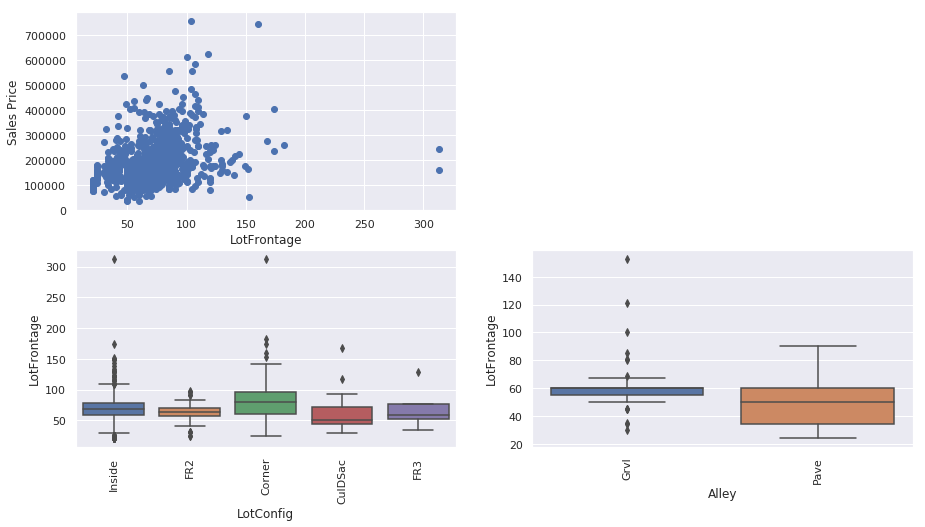

In [65]:
plt.figure(figsize=(15,8))
#LotConfig v.s LotFrontage

plt.subplot(2,2,1)
var = 'LotFrontage'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = plt.scatter(x=var, y="SalePrice", data=data)
plt.xlabel(var)
plt.ylabel('Sales Price')

plt.subplot(2,2,3)
var = 'LotConfig'
data = pd.concat([df_train['LotFrontage'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="LotFrontage", data=data)
#fig.axis(ymin=0, ymax=400);
plt.xticks(rotation=90);

plt.subplot(2,2,4)
var = 'Alley'
data = pd.concat([df_train['LotFrontage'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y="LotFrontage", data=data)
#fig.axis(ymin=0, ymax=400);
plt.xticks(rotation=90);

In [73]:
df_train.median()["LotFrontage"]

69.0

In [80]:
print(mode(df_train['LotFrontage'].dropna()))
print((mode(df_train['LotFrontage'].dropna())[1][0])/(df_train['LotFrontage'].count()))

ModeResult(mode=array([60.]), count=array([143]))
0.11906744379683597


* MasVnrArea

In [69]:
df_train.MasVnrArea.mode()

0    0.0
dtype: float64

In [70]:
print(mode(df_train['MasVnrArea'].dropna()))
print((mode(df_train['MasVnrArea'].dropna())[1][0])/(df_train['MasVnrArea'].count()))

#眾數 0 占總資料量近6成==>空值補眾數0

ModeResult(mode=array([0.]), count=array([861]))
0.5929752066115702


## 空值填補

### 數值型

* MasVnrArea 

In [82]:
df_train['MasVnrArea'].isnull().any()

False

In [81]:
#MasVnrArea 補眾數 0
#mode(df_train['MasVnrArea'].dropna())[0][0]:取眾數
df_train['MasVnrArea'].fillna((mode(df_train['MasVnrArea'].dropna())[0][0]), inplace=True)

* LotFrontage

In [93]:
df_train['LotFrontage'].isnull().sum()

0

In [74]:
df_train.groupby("LotConfig").median()["LotFrontage"]

LotConfig
Corner     80.0
CulDSac    50.0
FR2        64.0
FR3        59.5
Inside     68.0
Name: LotFrontage, dtype: float64

In [92]:
### fillna in "LotFrontage" with median according to "LotConfig"
nanIndexes={}
groups=df_train.groupby("LotConfig")
for name,group in groups:
    nanIndexes[name]=group["LotFrontage"][group["LotFrontage"].isnull()].index
nanIndexes
df_train["LotFrontage"][nanIndexes['Corner']]=80
df_train["LotFrontage"][nanIndexes['CulDSac']]=50
df_train["LotFrontage"][nanIndexes['FR2']]=64
df_train["LotFrontage"][nanIndexes['FR3']]=59
df_train["LotFrontage"][nanIndexes['Inside']]=68

### 類別型

In [134]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
GarageType       81  0.055479
GarageQual       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrType        8  0.005479
Electrical        1  0.000685
RoofMatl          0  0.000000
RoofStyle         0  0.000000
YearRemodAdd      0  0.000000
ExterQual         0  0.000000

In [121]:
null_col = ['GarageCond','GarageType','GarageFinish', \
            'GarageQual','BsmtExposure','BsmtFinType2', \
            'BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical']
null_col

['GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'Electrical']

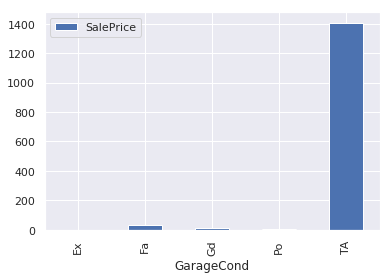

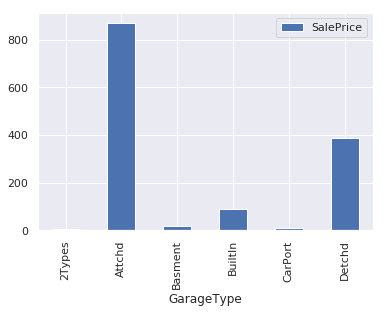

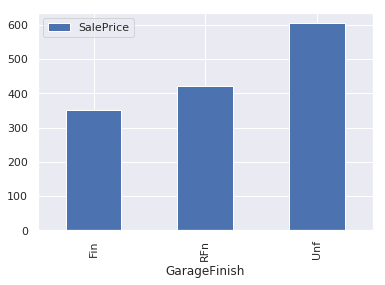

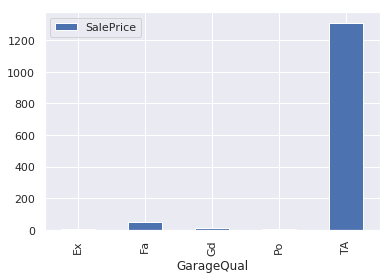

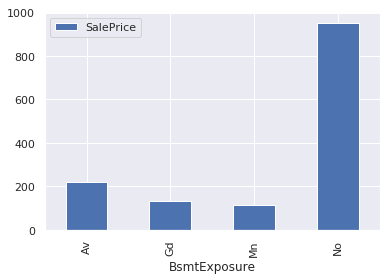

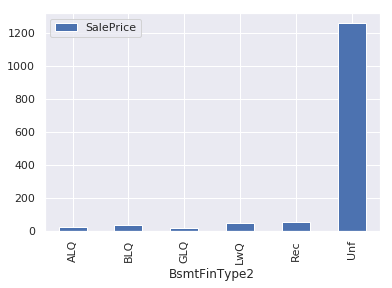

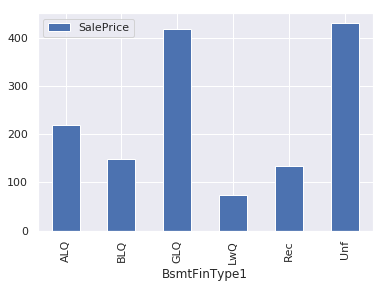

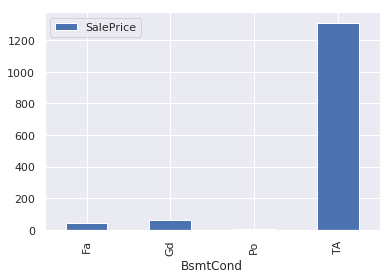

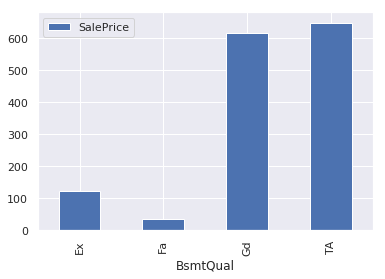

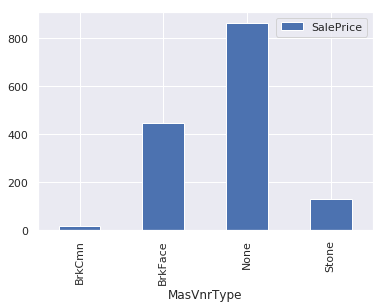

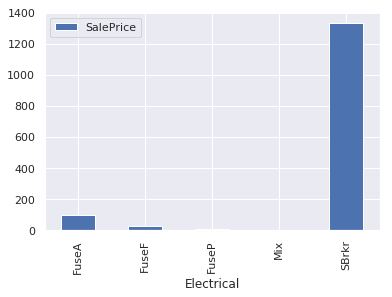

In [135]:
for col in null_col:
    ax=df_train[[col,'SalePrice']].groupby(col).count().plot(kind="bar")

In [140]:
#### fillna for object type columns
df_train.fillna({'GarageCond':'TA','GarageType':'No_define', 'GarageFinish':'No_define',\
                 'GarageQual':'TA','BsmtExposure':'No', 'BsmtFinType2':'Unf', 'BsmtFinType1':'No_define', \
                 'BsmtCond':'TA','BsmtQual':'No_define','MasVnrType':'None','Electrical':'SBrkr'}, inplace=True)

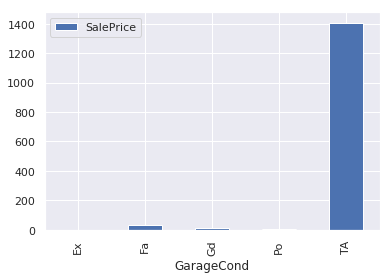

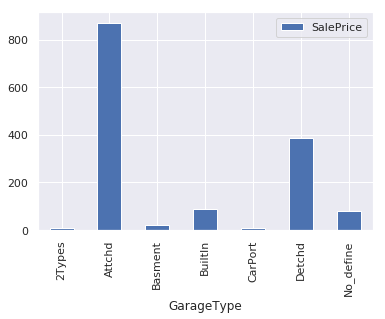

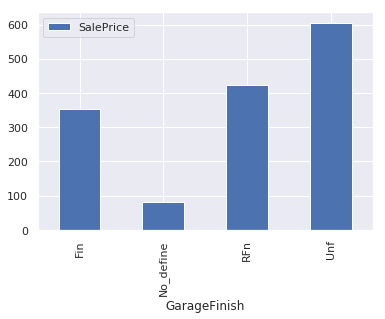

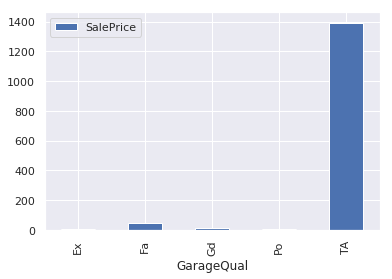

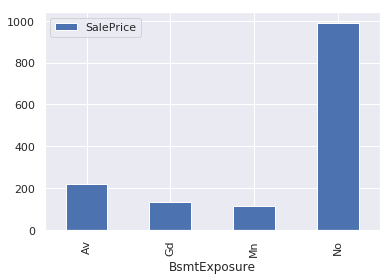

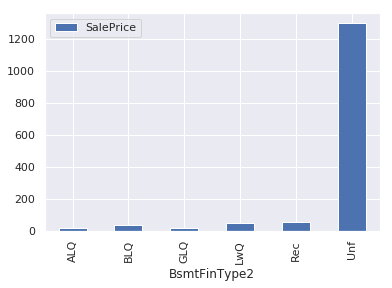

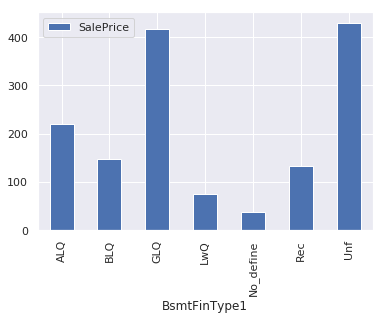

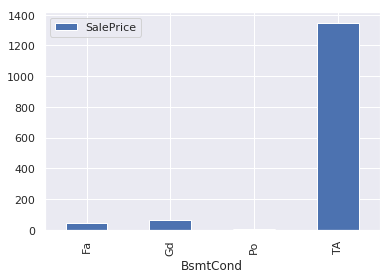

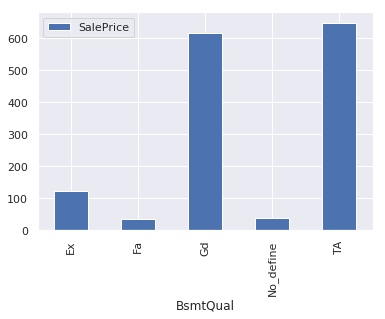

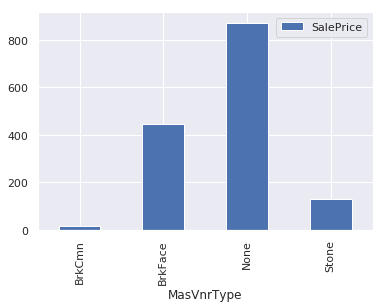

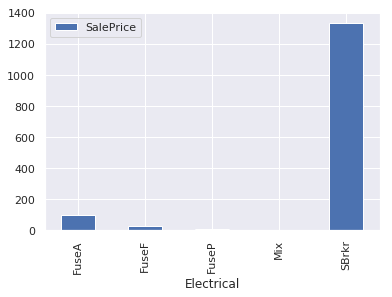

In [141]:
for col in null_col:
    ax=df_train[[col,'SalePrice']].groupby(col).count().plot(kind="bar")

# drop some column

In [143]:
#drop those having missing data more than 40%
#drop 'GarageYrBlt' for highly colinier w/ YearBuilt
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
GarageYrBlt      81  0.055479
BsmtExposure      0  0.000000
BsmtFinType1      0  0.000000
YearBuilt         0  0.000000
YearRemodAdd      0  0.000000
RoofStyle         0  0.000000
RoofMatl          0  0.000000
Exterior1st       0  0.000000
Exterior2nd       0  0.000000
MasVnrType        0  0.000000
MasVnrArea        0  0.000000
ExterQual         0  0.000000
ExterCond         0  0.000000
OverallCond       0  0.000000
BsmtQual          0  0.000000

In [152]:
####drop columns
df_train_drop = df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageYrBlt'],axis = 1)

In [153]:
df_train_drop.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'Enclos

### check cleaned data

In [154]:
df_train_drop.shape

(1460, 75)

In [156]:
df_train_drop.isnull().any().sum()

0

# Scikit-learn